In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from gnnad.graphanomaly import GNNAD
from gnnad.generate import GenerateGaussian, GenerateAnomaly
from gnnad.plot import plot_test_anomalies

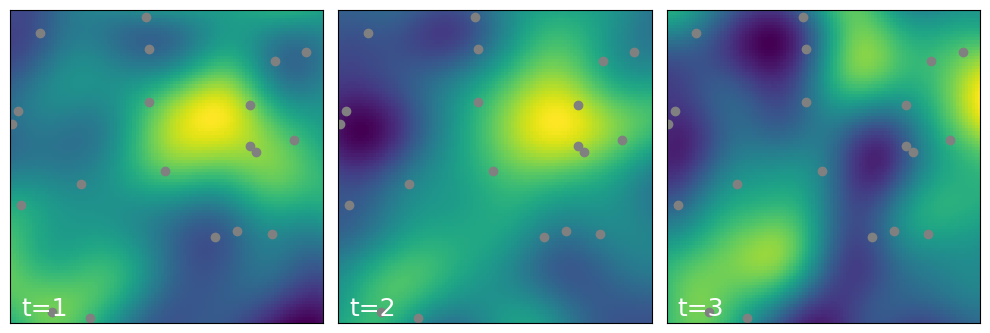

In [2]:
# generate data
gengauss = GenerateGaussian()
X = gengauss.generate()
gengauss.field_plot()


In [3]:
# split train test
X_train, X_test = train_test_split(X, shuffle=False)

# generate anomalies on test set
anoms = GenerateAnomaly(X_test)
X_test = anoms.generate(anoms.variability, lam = 3, prop_anom = 0.07, seed=45)
X_test = anoms.generate(anoms.drift, lam = 11, prop_anom = 0.07, seed=234)
y_test = anoms.get_labels()

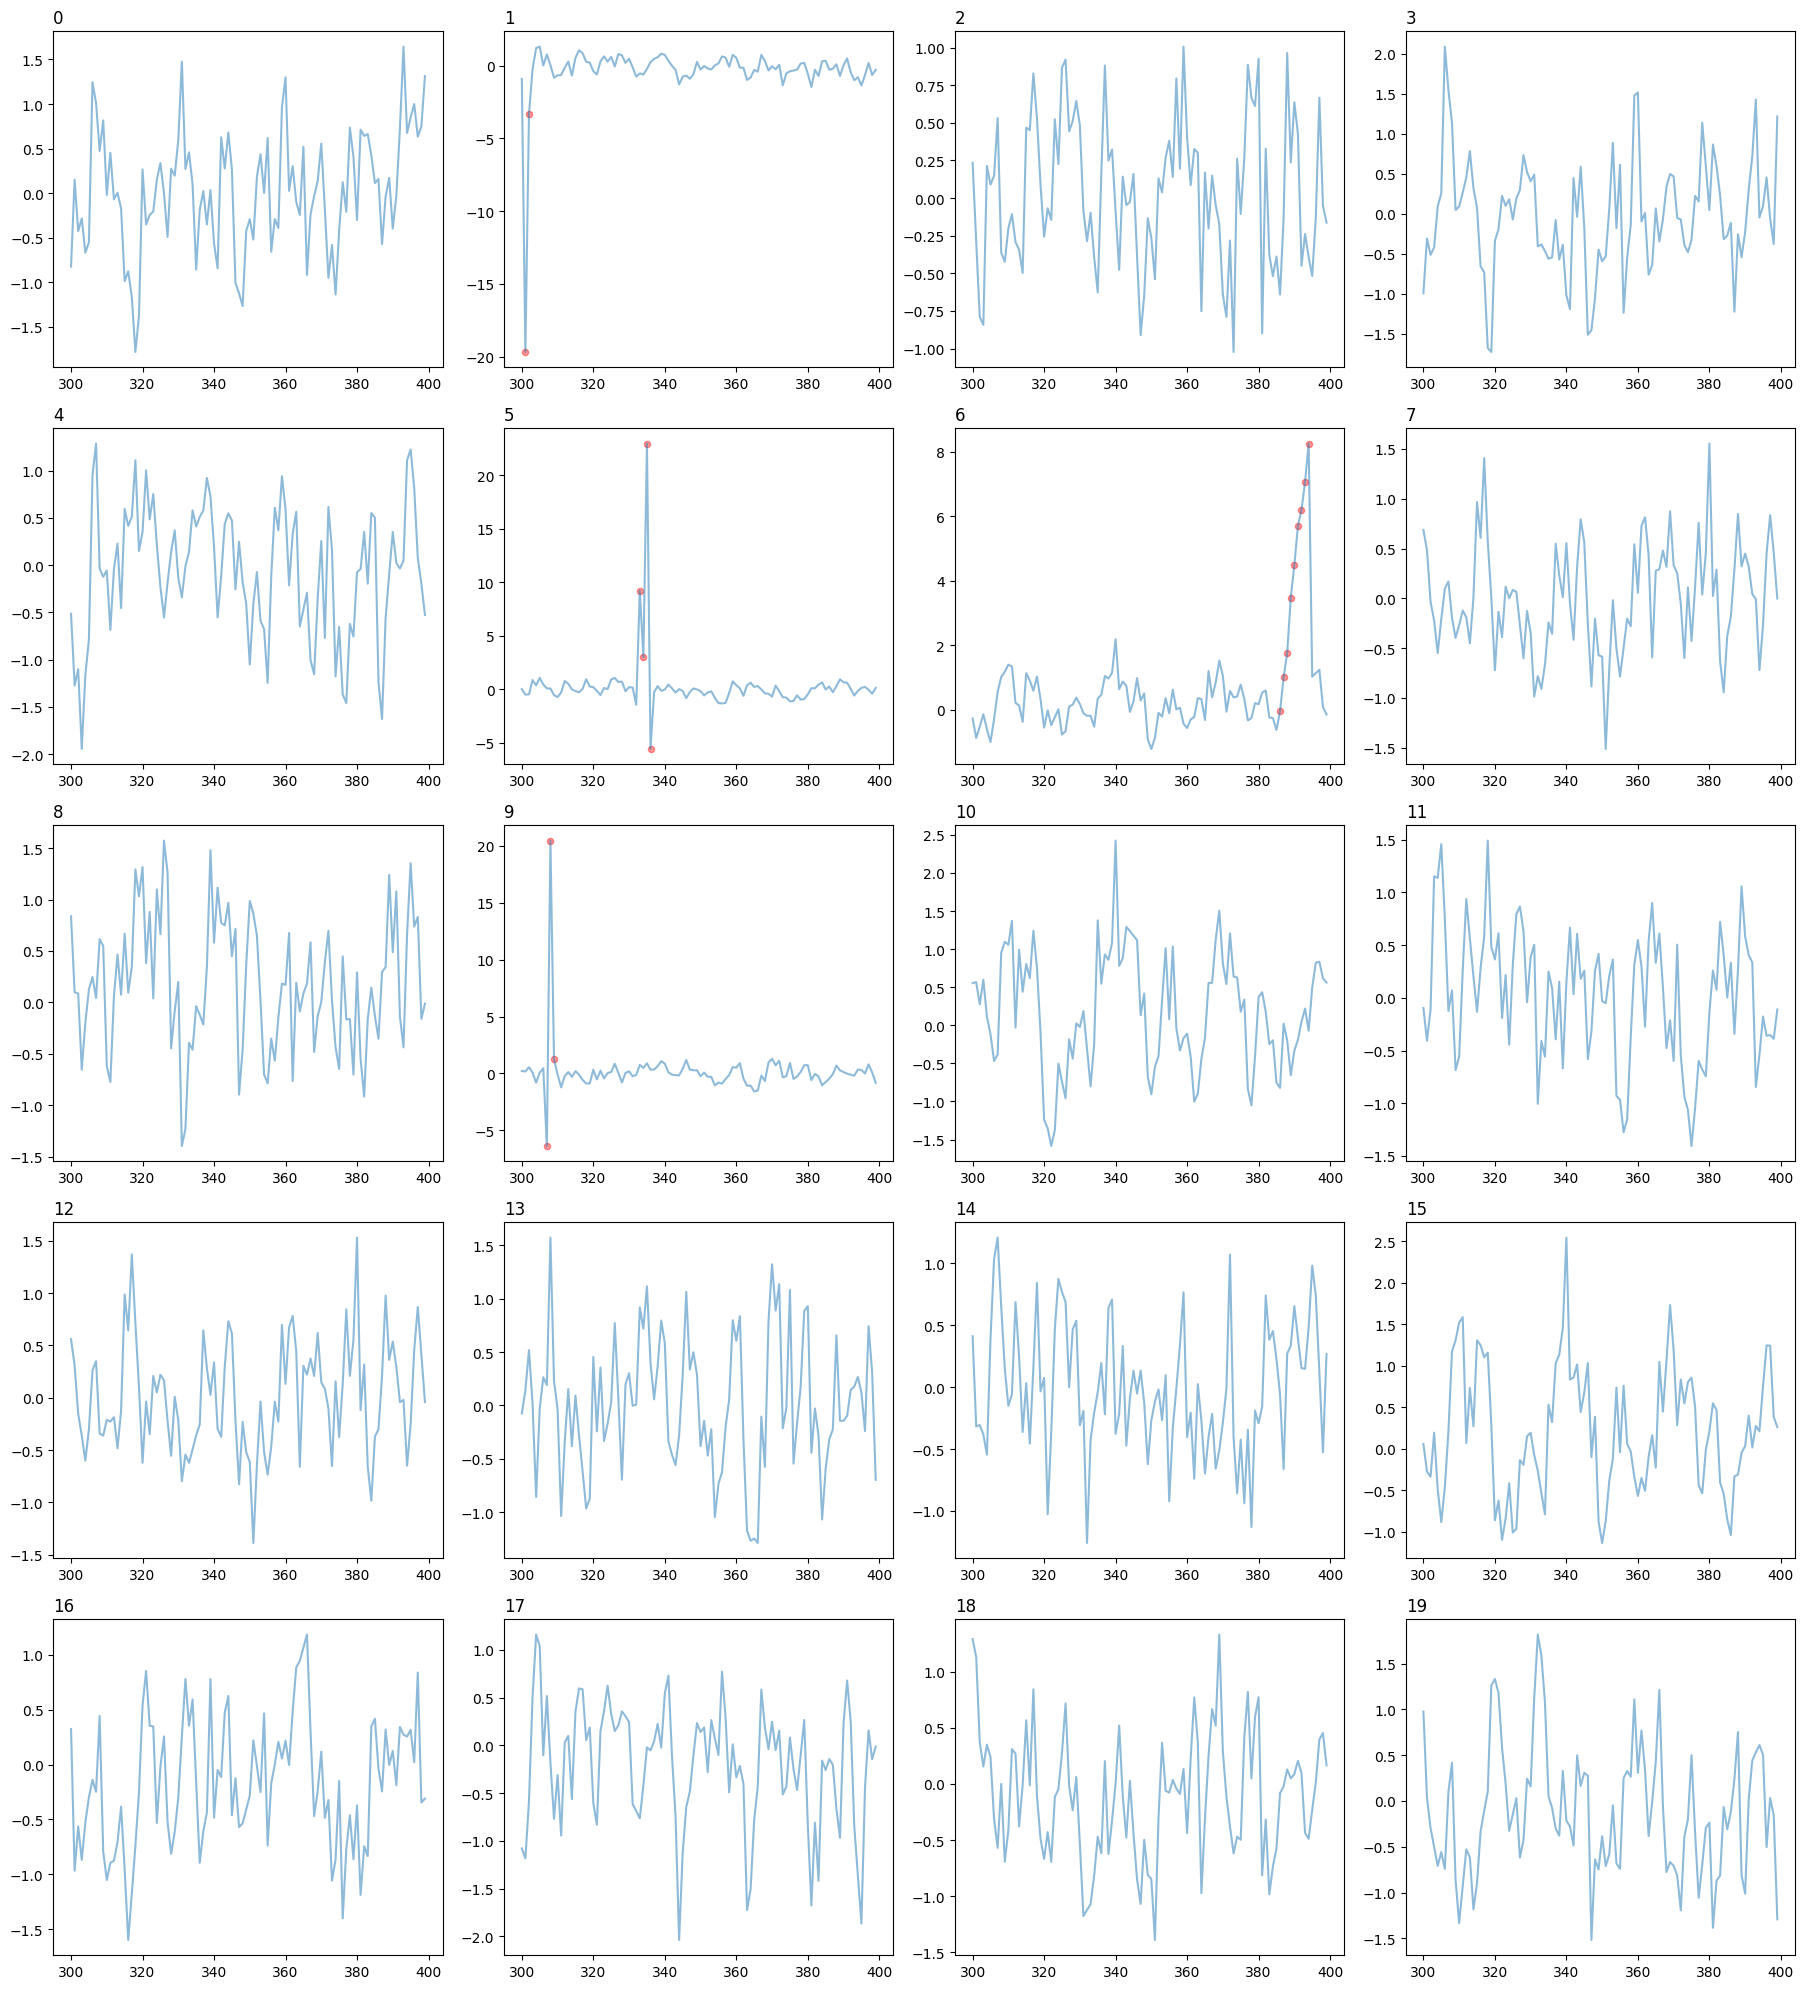

In [4]:
# plot input data
plot_test_anomalies(X_test, anoms.ANOMS, fig_cols=4, s=20)


In [12]:
# run model
model = GNNAD(threshold_type="max_validation", slide_win=3, topk=5)
fitted_model = model.fit(X_train, X_test, y_test)


epoch (0 / 100) (Loss:0.49526575, ACU_loss:0.49526575)
epoch (1 / 100) (Loss:0.45239231, ACU_loss:0.45239231)
epoch (2 / 100) (Loss:0.43802607, ACU_loss:0.43802607)
epoch (3 / 100) (Loss:0.43398476, ACU_loss:0.43398476)
epoch (4 / 100) (Loss:0.40352929, ACU_loss:0.40352929)
epoch (5 / 100) (Loss:0.40874359, ACU_loss:0.40874359)
epoch (6 / 100) (Loss:0.39248109, ACU_loss:0.39248109)
epoch (7 / 100) (Loss:0.39175493, ACU_loss:0.39175493)
epoch (8 / 100) (Loss:0.37955558, ACU_loss:0.37955558)
epoch (9 / 100) (Loss:0.37162271, ACU_loss:0.37162271)
epoch (10 / 100) (Loss:0.35698426, ACU_loss:0.35698426)
epoch (11 / 100) (Loss:0.35649341, ACU_loss:0.35649341)
epoch (12 / 100) (Loss:0.35466003, ACU_loss:0.35466003)
epoch (13 / 100) (Loss:0.34450704, ACU_loss:0.34450704)
epoch (14 / 100) (Loss:0.32834926, ACU_loss:0.32834926)
epoch (15 / 100) (Loss:0.34838301, ACU_loss:0.34838301)
=========================** Result **============================

F1 score: 0.30303030303030304
precision: 0.1807